<a href="https://colab.research.google.com/github/Gokulavadhani-U/-PRODIGY_ML_01-/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:08<00:00, 40.9MB/s]
100% 1.06G/1.06G [00:09<00:00, 127MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)



In [ ]:
# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))




In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 3112s 5s/step - loss: 2.0115 - accuracy: 0.5936 - val_loss: 0.6803 - val_accuracy: 0.6144
Epoch 2/10
625/625 [==============================] - 3156s 5s/step - loss: 0.6453 - accuracy: 0.6400 - val_loss: 0.6483 - val_accuracy: 0.6408
Epoch 3/10
625/625 [==============================] - 3117s 5s/step - loss: 0.5804 - accuracy: 0.6895 - val_loss: 0.6489 - val_accuracy: 0.6602
Epoch 4/10
625/625 [==============================] - 3109s 5s/step - loss: 0.4616 - accuracy: 0.7704 - val_loss: 0.7197 - val_accuracy: 0.6580
Epoch 5/10
625/625 [==============================] - 3074s 5s/step - loss: 0.3313 - accuracy: 0.8497 - val_loss: 0.8950 - val_accuracy: 0.6664
Epoch 6/10
625/625 [==============================] - 3070s 5s/step - loss: 0.2278 - accuracy: 0.9075 - val_loss: 1.1183 - val_accuracy: 0.6564
Epoch 7/10
625/625 [==============================] - 3048s 5s/step - loss: 0.1796 - accuracy: 0.9362 - val_loss: 1.3760 - val_accuracy:

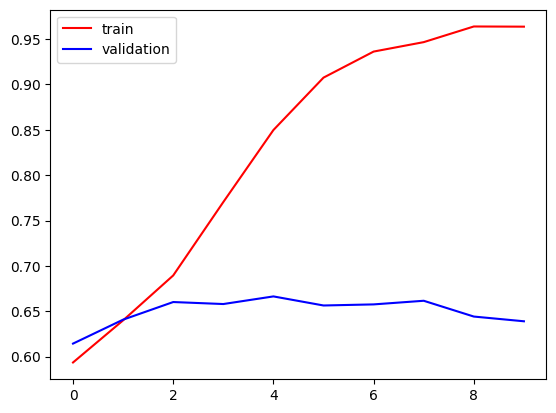

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

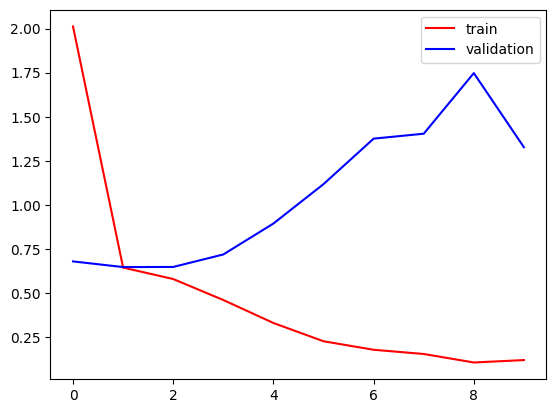

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

In [ ]:
from PIL import Image

try:
    test_img = Image.open("/content/cat.9.jpg")
except Exception as e:
    print(f"Error loading the image: {e}")
    # Handle the error (e.g., print an error message, log the error, etc.)


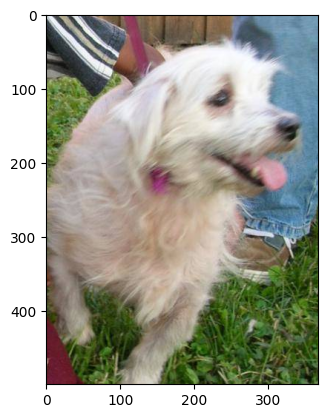

In [ ]:
from PIL import Image
import numpy as np

try:
    test_img = Image.open("/content/dog.9.jpg")
    if test_img is not None:
        # Convert the image to a NumPy array and then to uint8
        test_img = np.array(test_img)
        if test_img.dtype != np.uint8:
            test_img = test_img.astype(np.uint8)

        # Display the image
        plt.imshow(test_img)
        plt.show()
    else:
        print("Image loading failed.")
except Exception as e:
    print(f"Error loading the image: {e}")


In [ ]:
test_img.shape

(500, 368, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 106ms/step


array([[0.99398327]], dtype=float32)